In [1]:
import mat73
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import random
import tqdm
import os
np.random.seed(0)

In [2]:
def load_dataframe():
    data_dict = mat73.loadmat('spect_phee2monkey_stft_40X40_2monkey.mat')
    part_data_dict = {key: data_dict[key] for key in data_dict.keys() if key in ['callee', 'caller', 'expname', 'expnameid']}
    df = pd.DataFrame(part_data_dict)
    for name in ['callee', 'caller', 'expname']:
        df[name] = df[name].apply(lambda x: x[0])
    frq = pd.DataFrame(data_dict["frq"].T)
    frq.columns = [f"frq_{i}" for i in range(1, 41)]
    ft = np.abs(pd.DataFrame(data_dict["ft"].T))
    ft.columns = [f"ft_{i}" for i in range(1, 41)]
    df = pd.concat([df, frq, ft], axis=1)
    return df

In [3]:
def show_cm(partner1, partner2,  cmn, labels):
    fig, ax = plt.subplots(figsize=(15,15))
    f = sns.heatmap(cmn, annot=True, fmt=".1%", linewidths=1.0, square=1, cmap="rocket_r")
    plt.title(f"Caller - {partner1}, Callee - {partner2}", fontsize=25)
    plt.xlabel('Predicted Label', fontsize=20)
    plt.ylabel('True Label', fontsize=20)
    _ = ax.set_xticklabels(labels)
    _ = plt.xticks(rotation=70)
    _ = ax.set_yticklabels(labels)
    _ = plt.yticks(rotation=0)

    plt.show()

In [4]:
df = load_dataframe()

In [5]:
family_groups = [['Adonis', 'Ceto', 'Ella'], ['Dionysus', 'Dia'], ['Bhumi', 'Brahma', 'Bareket', 'Bolt', 'Baloo', 'Barak']]
pairs = [(family, member) for family_group in family_groups for family in family_group for member in family_group if family != member]

In [6]:
non_family_data = {'name': [], 'non_family_members': []}

for group in family_groups:
    for member in group:
        non_family_members = []
        for other_group in family_groups:
            if other_group != group:
                non_family_members.extend(other_group)
        non_family_members = list(set(non_family_members))  # Remove duplicates
        if member in non_family_members:
            non_family_members.remove(member)  # Remove the current family member from the list
        non_family_data['name'].append(member)
        non_family_data['non_family_members'].append(non_family_members)

non_family_members_df = pd.DataFrame(non_family_data)

  0%|          | 0/100 [00:00<?, ?it/s]

callees of other in train before filter:
 Ceto        129
Dia         129
Dionysus    129
Ella        129
Name: callee, dtype: int64
callees in train after filter:
 Ceto     129
other    129
Name: callee, dtype: int64
callers in test before filter:
 Dia         1103
Dionysus    1024
Bhumi        129
Name: caller, dtype: int64
callees in test after filter:
 Ceto     564
other    564
Name: callee, dtype: int64


100%|██████████| 100/100 [01:57<00:00,  1.18s/it]


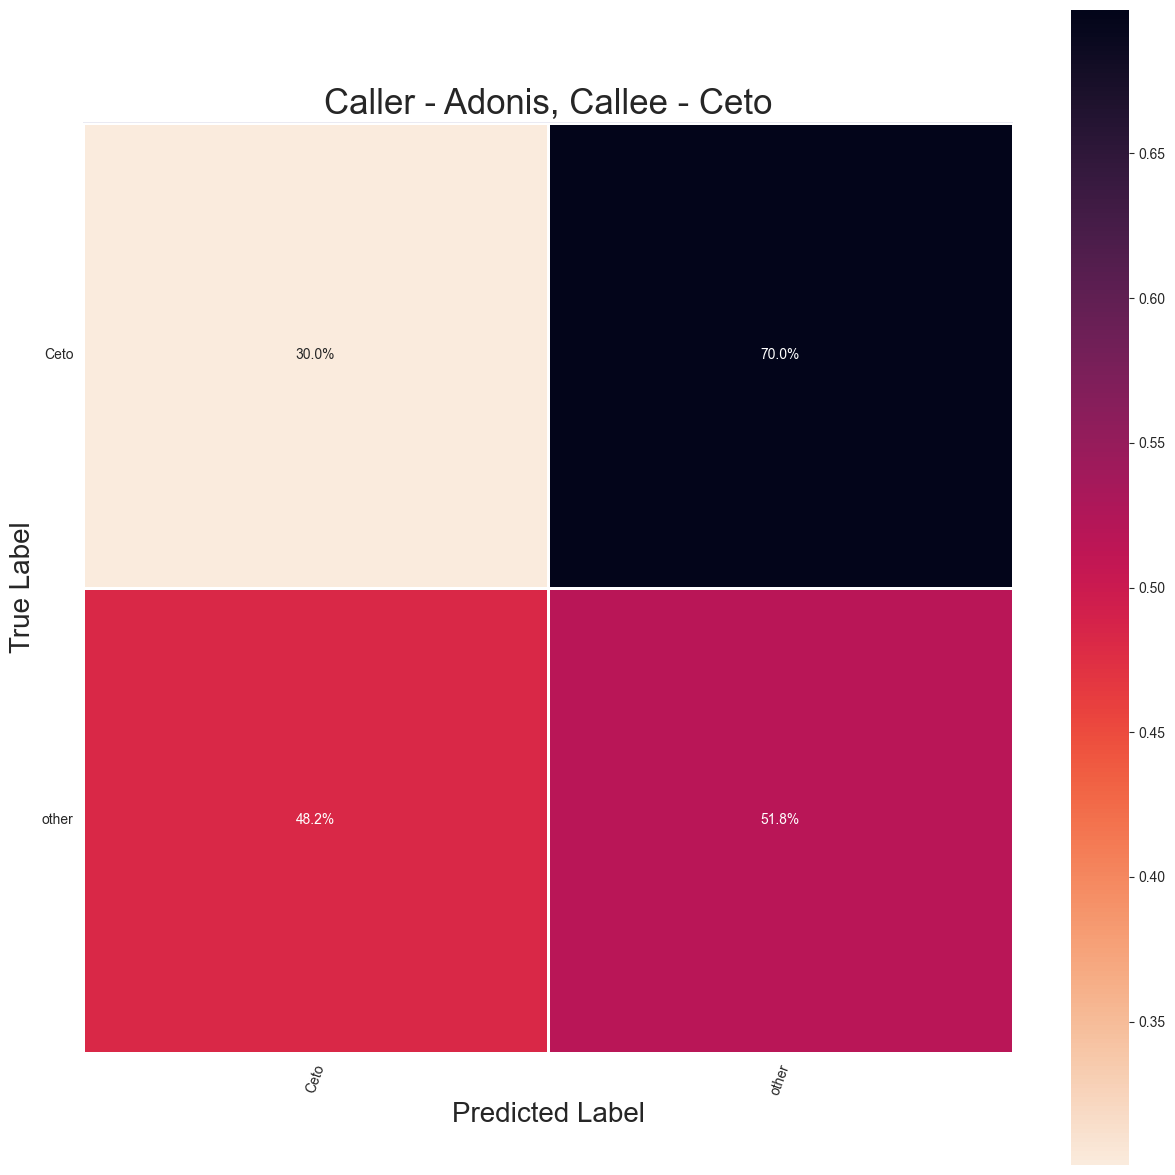

  0%|          | 0/100 [00:00<?, ?it/s]

callees of other in train before filter:
 Ceto        129
Dia         129
Dionysus    129
Ella        129
Name: callee, dtype: int64
callees in train after filter:
 Ella     129
other    129
Name: callee, dtype: int64
callers in test before filter:
 Dia         1109
Dionysus    1021
Bhumi        126
Name: caller, dtype: int64
callees in test after filter:
 Ella     564
other    564
Name: callee, dtype: int64


100%|██████████| 100/100 [01:40<00:00,  1.01s/it]


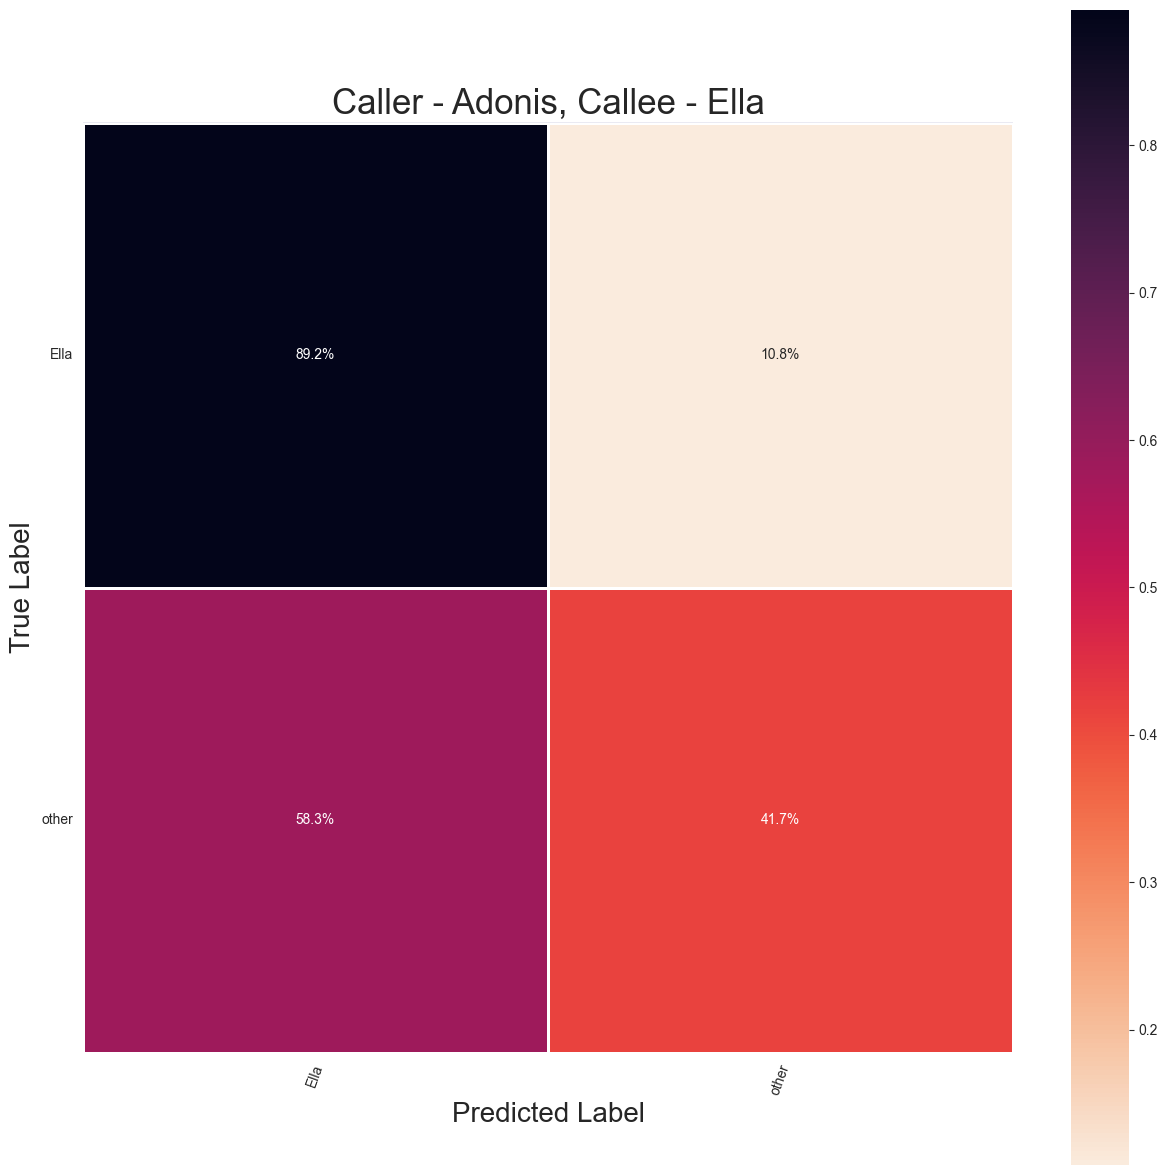

  0%|          | 0/100 [00:00<?, ?it/s]

callees of other in train before filter:
 Adonis      150
Bhumi       150
Brahma      150
Chaos       150
Dia         150
Dionysus    150
Name: callee, dtype: int64
callees in train after filter:
 Adonis    150
other     150
Name: callee, dtype: int64
callers in test before filter:
 Dionysus    130
Dia          95
Bolt         29
Bhumi        21
Brahma       16
Baloo         9
Bareket       6
Name: caller, dtype: int64
callees in test after filter:
 Adonis    51
other     51
Name: callee, dtype: int64


100%|██████████| 100/100 [01:33<00:00,  1.07it/s]


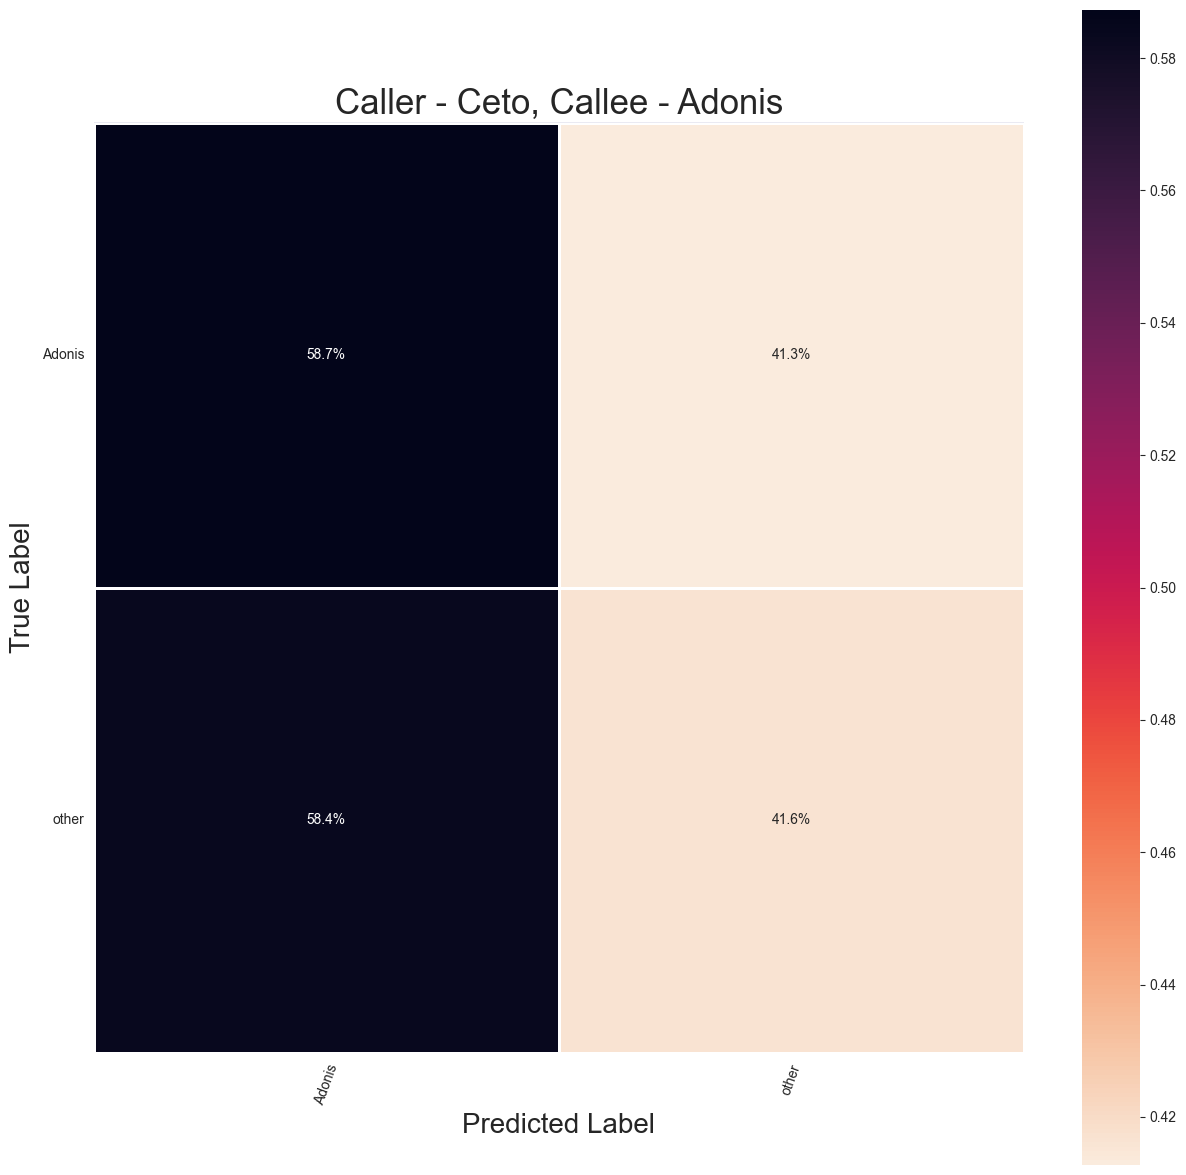

  0%|          | 0/100 [00:00<?, ?it/s]


callees of other in train before filter:
 Adonis      150
Bhumi       150
Brahma      150
Chaos       150
Dia         150
Dionysus    150
Name: callee, dtype: int64


  0%|          | 0/100 [00:00<?, ?it/s]

callees of other in train before filter:
 Adonis      144
Bhumi       144
Dia         144
Dionysus    144
Name: callee, dtype: int64
callees in train after filter:
 Adonis    144
other     144
Name: callee, dtype: int64
callers in test before filter:
 Dia         3029
Dionysus    2833
Brahma       599
Bolt         400
Baloo        227
Bhumi        104
Bareket       78
Barak         14
Name: caller, dtype: int64
callees in test after filter:
 Adonis    1821
other     1821
Name: callee, dtype: int64


100%|██████████| 100/100 [01:22<00:00,  1.21it/s]


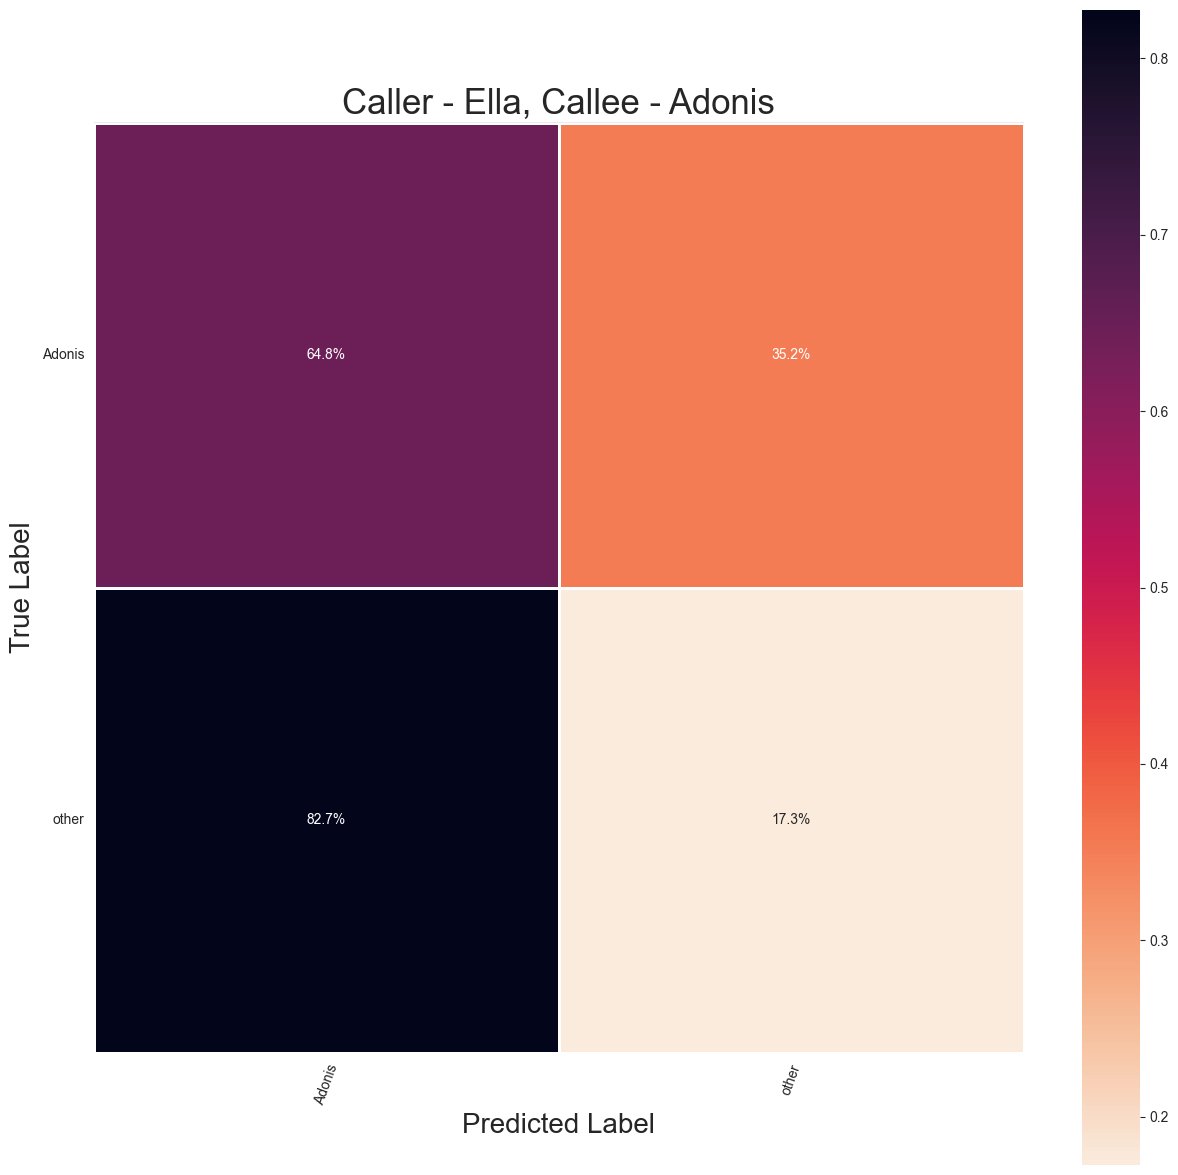

  0%|          | 0/100 [00:00<?, ?it/s]


callees of other in train before filter:
 Adonis      144
Bhumi       144
Dia         144
Dionysus    144
Name: callee, dtype: int64


  0%|          | 0/100 [00:00<?, ?it/s]

callees of other in train before filter:
 Adonis    51
Bhumi     51
Brahma    51
Ceto      51
Chaos     51
Dia       51
Ella      51
Name: callee, dtype: int64
callees in train after filter:
 Dia      51
other    51
Name: callee, dtype: int64
callers in test before filter:
 Ceto       546
Adonis     291
Bhumi      186
Bolt        83
Brahma      78
Baloo       56
Ella        30
Bareket     27
Barak        5
Name: caller, dtype: int64
callees in test after filter:
 Dia      186
other    186
Name: callee, dtype: int64


100%|██████████| 100/100 [00:54<00:00,  1.83it/s]


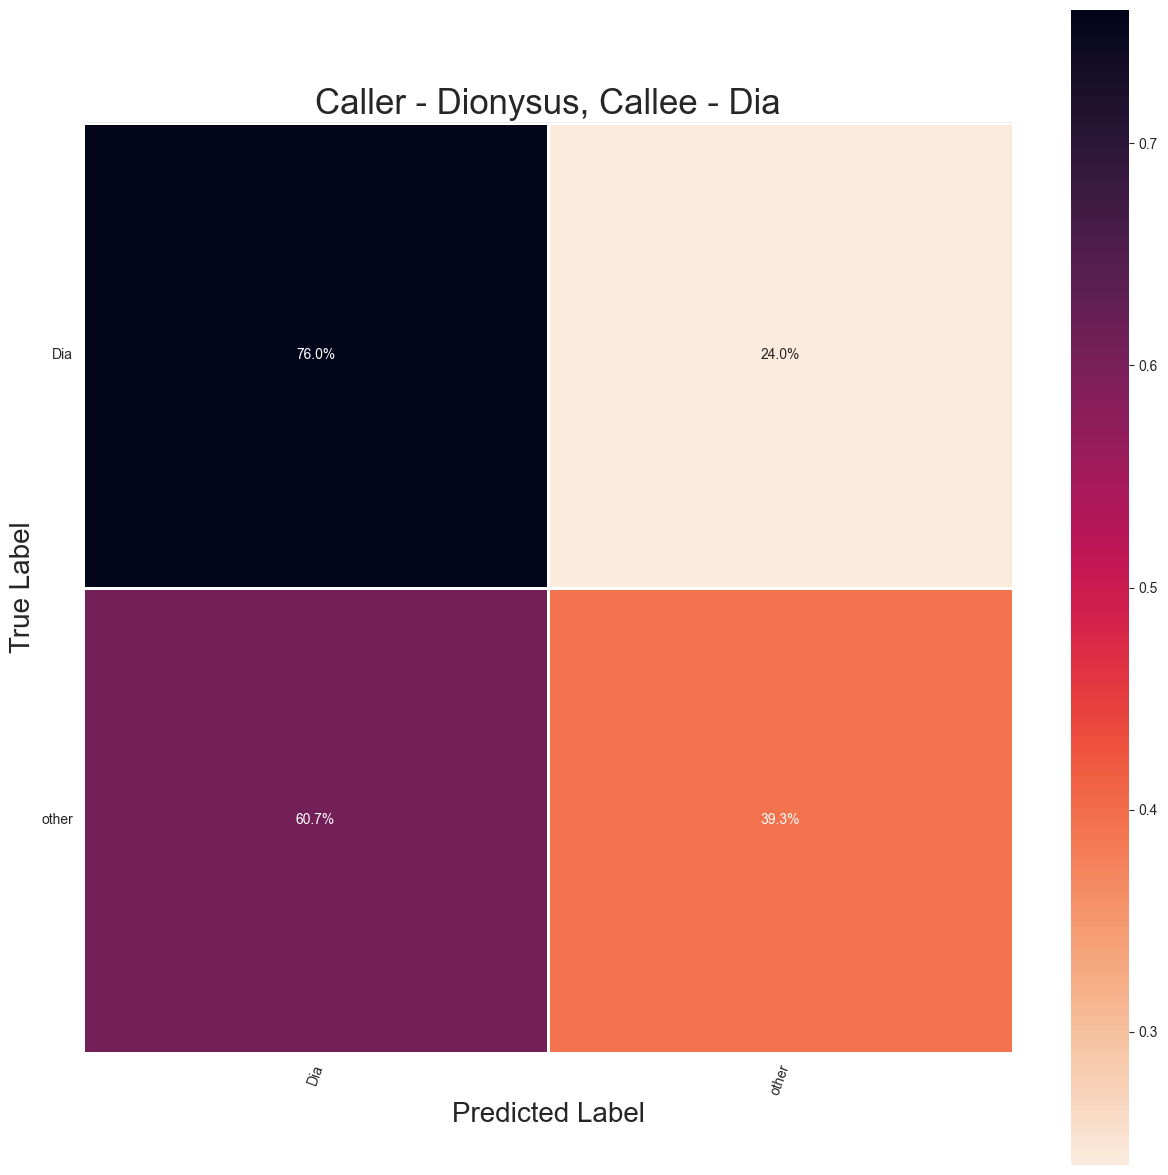

  0%|          | 0/100 [00:00<?, ?it/s]

callees of other in train before filter:
 Adonis      79
Bhumi       79
Brahma      79
Ceto        79
Dionysus    79
Ella        79
Name: callee, dtype: int64
callees in train after filter:
 Dionysus    79
other       79
Name: callee, dtype: int64
callers in test before filter:
 Ceto       421
Adonis     379
Bhumi      235
Bolt       123
Brahma      88
Baloo       81
Ella        66
Bareket     25
Barak        4
Name: caller, dtype: int64
callees in test after filter:
 Dionysus    237
other       237
Name: callee, dtype: int64


100%|██████████| 100/100 [00:55<00:00,  1.81it/s]


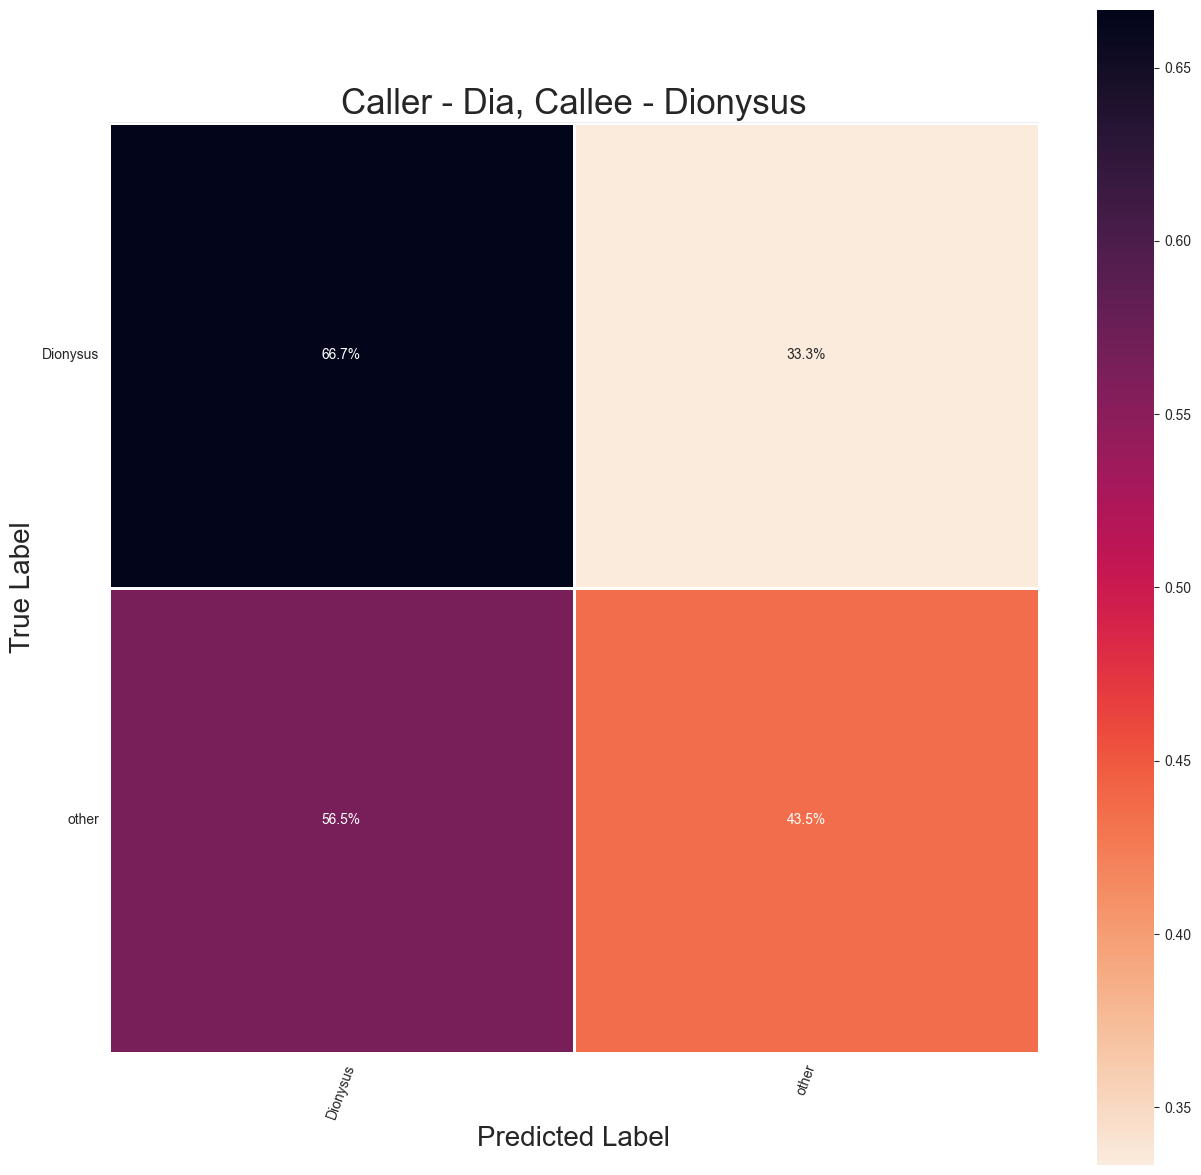

  0%|          | 0/100 [00:00<?, ?it/s]

callees of other in train before filter:
 Adonis      51
Brahma      51
Ceto        51
Dia         51
Dionysus    51
Ella        51
Name: callee, dtype: int64
callees in train after filter:
 Brahma    51
other     51
Name: callee, dtype: int64
callers in test before filter:
 Dia         1512
Dionysus    1046
Ceto         650
Adonis       262
Ella          40
Name: caller, dtype: int64
callees in test after filter:
 Brahma    585
other     585
Name: callee, dtype: int64


100%|██████████| 100/100 [01:10<00:00,  1.41it/s]


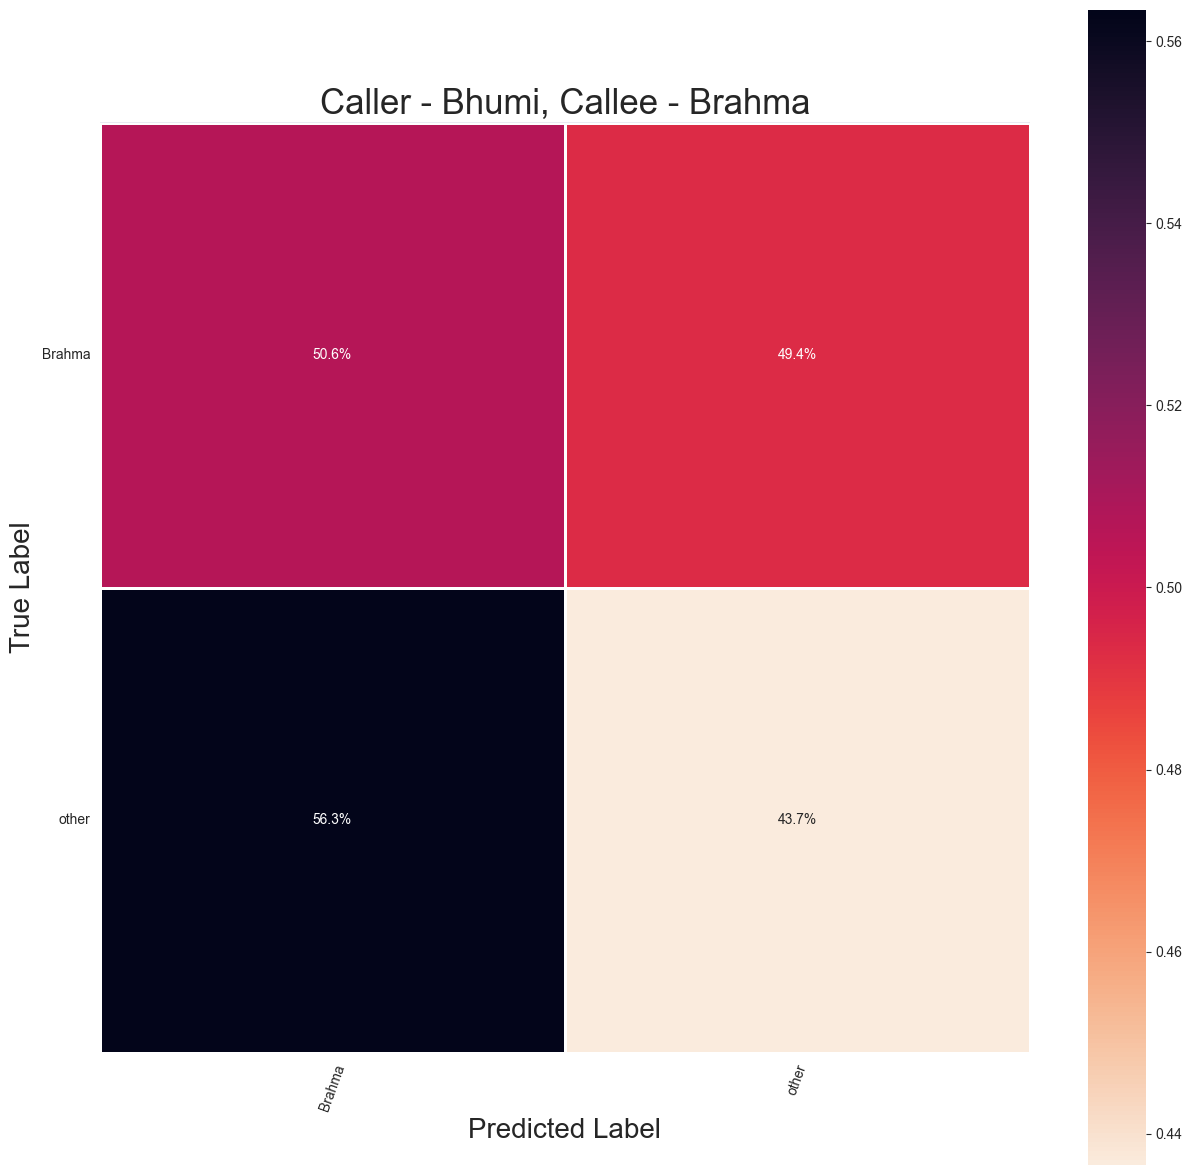

  0%|          | 0/100 [00:00<?, ?it/s]


callees of other in train before filter:
 Adonis      51
Brahma      51
Ceto        51
Dia         51
Dionysus    51
Ella        51
Name: callee, dtype: int64


  0%|          | 0/100 [00:00<?, ?it/s]


callees of other in train before filter:
 Adonis      51
Brahma      51
Ceto        51
Dia         51
Dionysus    51
Ella        51
Name: callee, dtype: int64


  0%|          | 0/100 [00:00<?, ?it/s]


callees of other in train before filter:
 Adonis      51
Brahma      51
Ceto        51
Dia         51
Dionysus    51
Ella        51
Name: callee, dtype: int64


  0%|          | 0/100 [00:00<?, ?it/s]


callees of other in train before filter:
 Adonis      51
Brahma      51
Ceto        51
Dia         51
Dionysus    51
Ella        51
Name: callee, dtype: int64


  0%|          | 0/100 [00:00<?, ?it/s]

callees of other in train before filter:
 Bhumi     157
Brahma    157
Name: callee, dtype: int64
callees in train after filter:
 Bhumi    157
other    157
Name: callee, dtype: int64
callers in test before filter:
 Dia         1217
Dionysus     511
Ceto         343
Ella         237
Name: caller, dtype: int64
callees in test after filter:
 Bhumi    1154
other    1154
Name: callee, dtype: int64


100%|██████████| 100/100 [00:49<00:00,  2.04it/s]


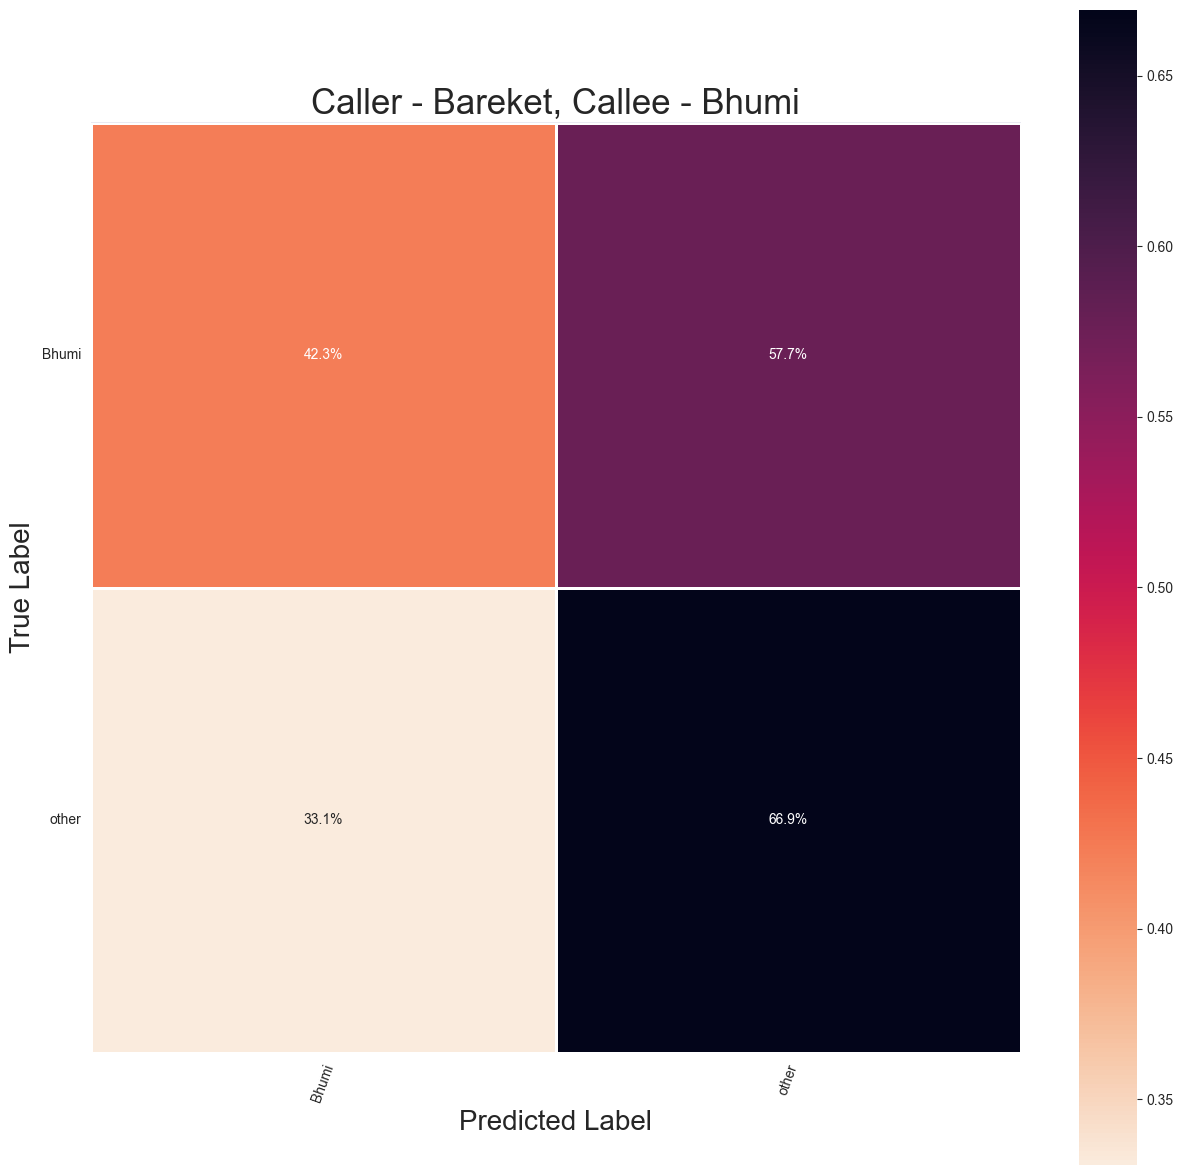

  0%|          | 0/100 [00:00<?, ?it/s]

callees of other in train before filter:
 Bhumi     157
Brahma    157
Name: callee, dtype: int64
callees in train after filter:
 Brahma    157
other     157
Name: callee, dtype: int64
callers in test before filter:
 Dia         1202
Dionysus     524
Ceto         332
Ella         250
Name: caller, dtype: int64
callees in test after filter:
 Brahma    1154
other     1154
Name: callee, dtype: int64


100%|██████████| 100/100 [00:45<00:00,  2.19it/s]


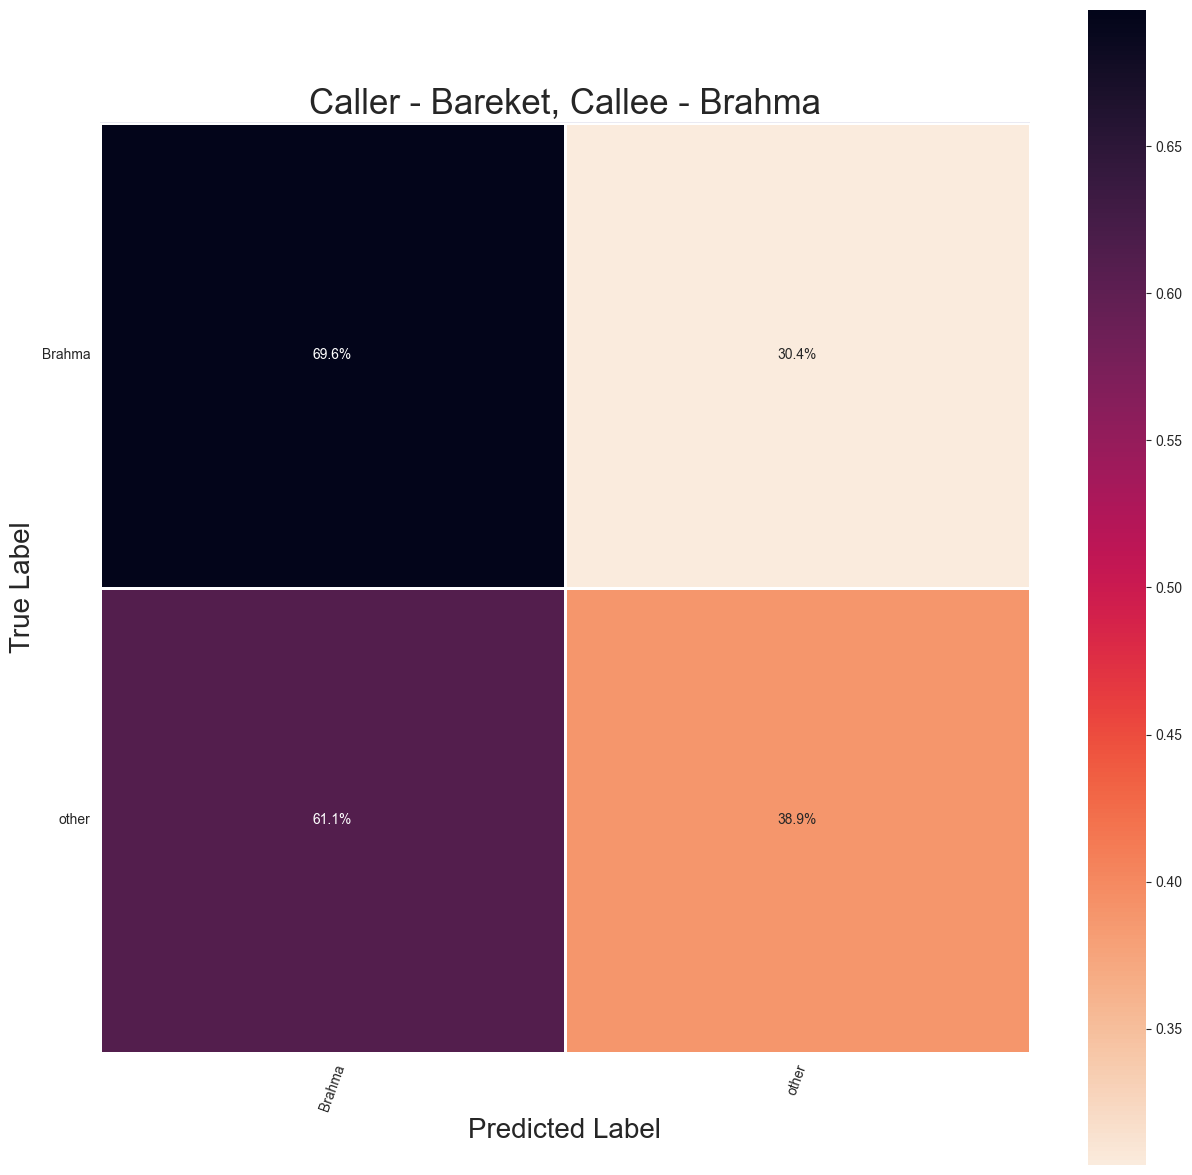

  0%|          | 0/100 [00:00<?, ?it/s]


callees of other in train before filter:
 Bhumi     157
Brahma    157
Name: callee, dtype: int64


  0%|          | 0/100 [00:00<?, ?it/s]


callees of other in train before filter:
 Bhumi     157
Brahma    157
Name: callee, dtype: int64


  0%|          | 0/100 [00:00<?, ?it/s]

callees of other in train before filter:
 Bhumi     157
Brahma    157
Name: callee, dtype: int64


  0%|          | 0/100 [00:00<?, ?it/s]

callees of other in train before filter:
 Bhumi     629
Brahma    629
Name: callee, dtype: int64
callees in train after filter:
 Bhumi    629
other    629
Name: callee, dtype: int64
callers in test before filter:
 Dia         1218
Dionysus     516
Ceto         347
Ella         227
Name: caller, dtype: int64
callees in test after filter:
 Bhumi    1154
other    1154
Name: callee, dtype: int64


100%|██████████| 100/100 [02:06<00:00,  1.27s/it]


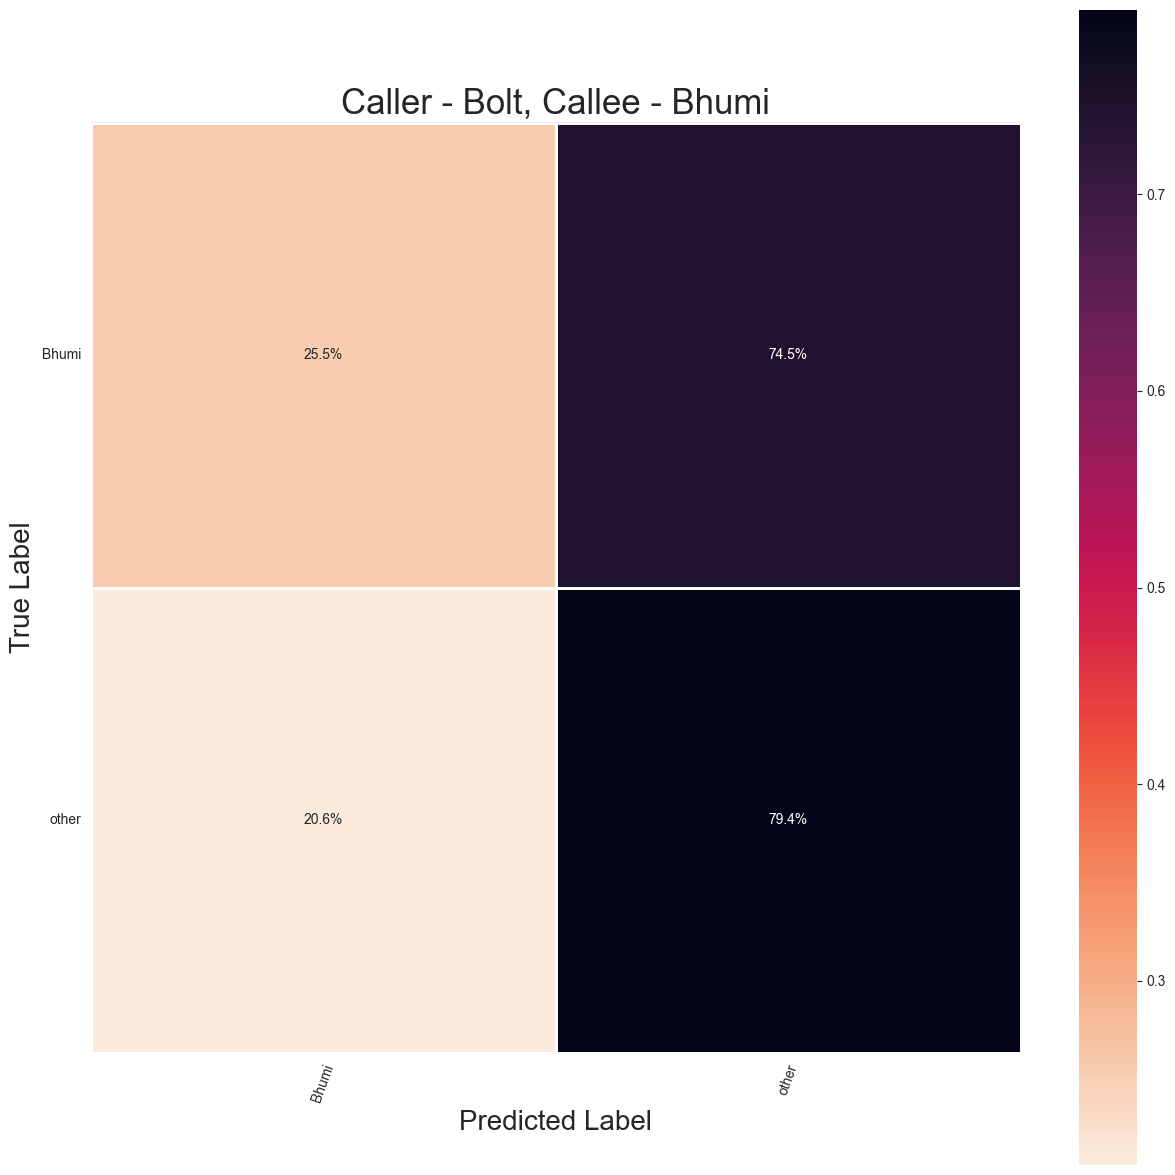

  0%|          | 0/100 [00:00<?, ?it/s]

callees of other in train before filter:
 Bhumi     629
Brahma    629
Name: callee, dtype: int64
callees in train after filter:
 Brahma    629
other     629
Name: callee, dtype: int64
callers in test before filter:
 Dia         1215
Dionysus     531
Ceto         334
Ella         228
Name: caller, dtype: int64
callees in test after filter:
 Brahma    1154
other     1154
Name: callee, dtype: int64


100%|██████████| 100/100 [02:08<00:00,  1.28s/it]


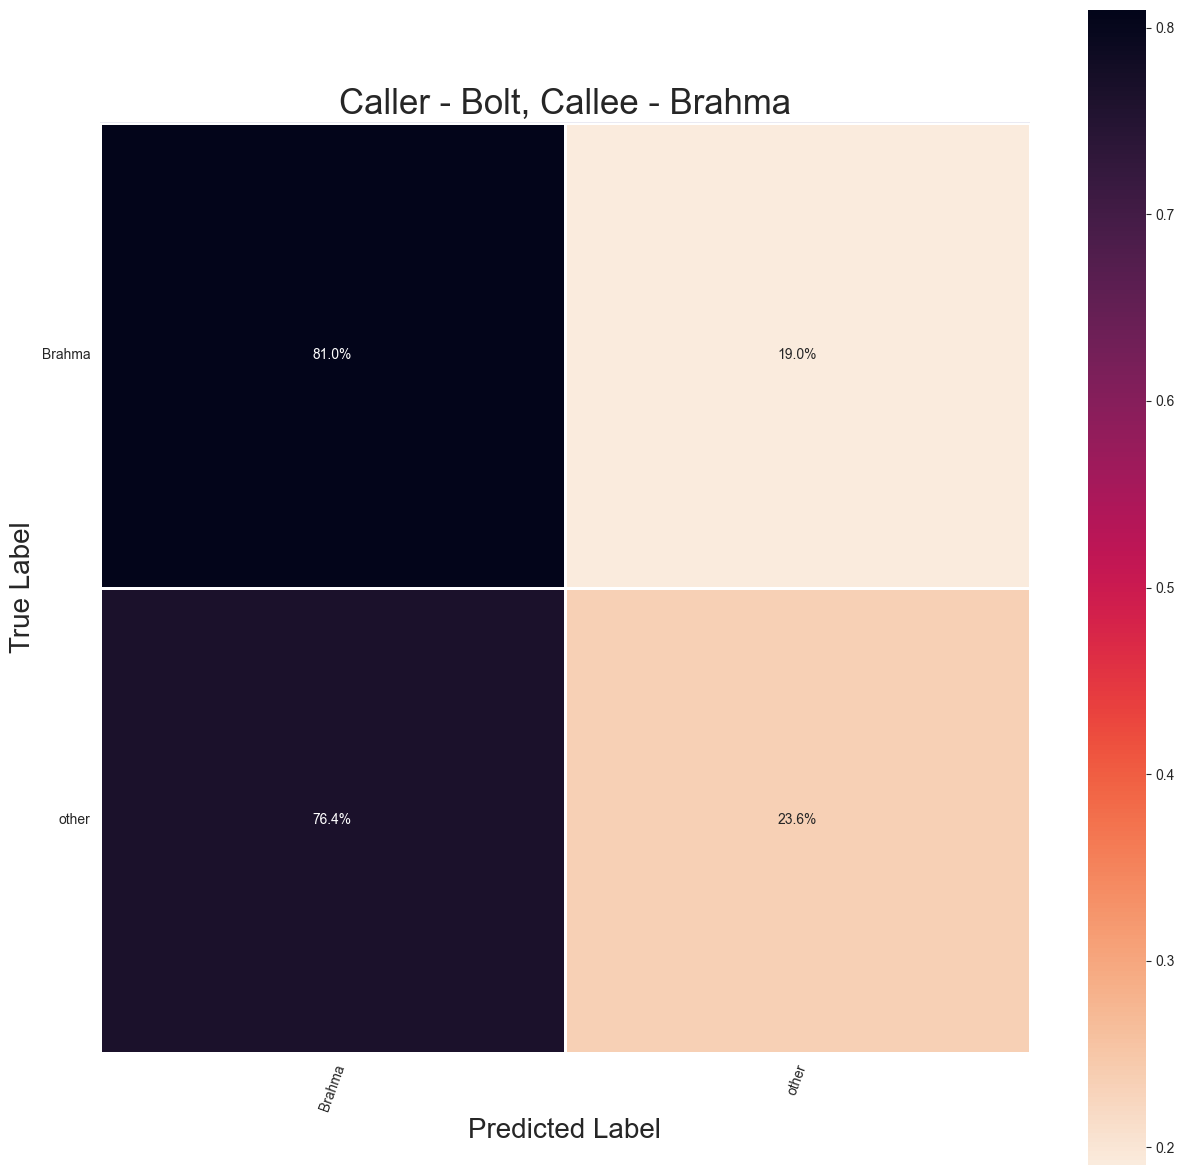

  0%|          | 0/100 [00:00<?, ?it/s]


callees of other in train before filter:
 Bhumi     629
Brahma    629
Name: callee, dtype: int64


  0%|          | 0/100 [00:00<?, ?it/s]


callees of other in train before filter:
 Bhumi     629
Brahma    629
Name: callee, dtype: int64


  0%|          | 0/100 [00:00<?, ?it/s]


callees of other in train before filter:
 Bhumi     629
Brahma    629
Name: callee, dtype: int64


  0%|          | 0/100 [00:00<?, ?it/s]

callees of other in train before filter:
 Bhumi     387
Brahma    387
Name: callee, dtype: int64
callees in train after filter:
 Bhumi    387
other    387
Name: callee, dtype: int64
callers in test before filter:
 Dia         1214
Dionysus     525
Ceto         337
Ella         232
Name: caller, dtype: int64
callees in test after filter:
 Bhumi    1154
other    1154
Name: callee, dtype: int64


100%|██████████| 100/100 [01:16<00:00,  1.31it/s]


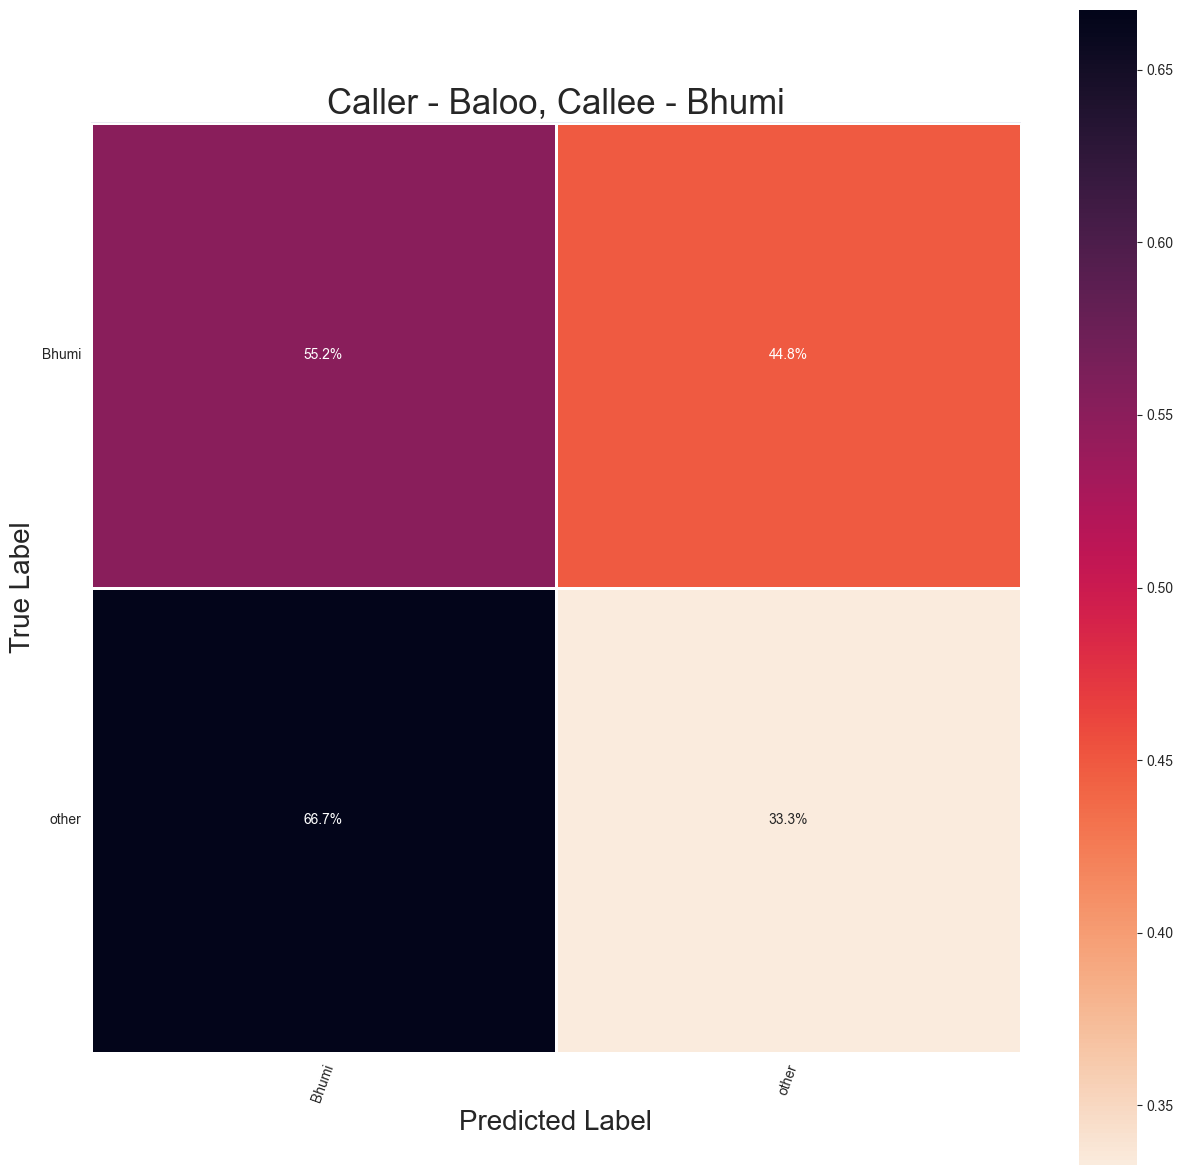

  0%|          | 0/100 [00:00<?, ?it/s]

callees of other in train before filter:
 Bhumi     387
Brahma    387
Name: callee, dtype: int64
callees in train after filter:
 Brahma    387
other     387
Name: callee, dtype: int64
callers in test before filter:
 Dia         1219
Dionysus     527
Ceto         327
Ella         235
Name: caller, dtype: int64
callees in test after filter:
 Brahma    1154
other     1154
Name: callee, dtype: int64


100%|██████████| 100/100 [01:16<00:00,  1.30it/s]


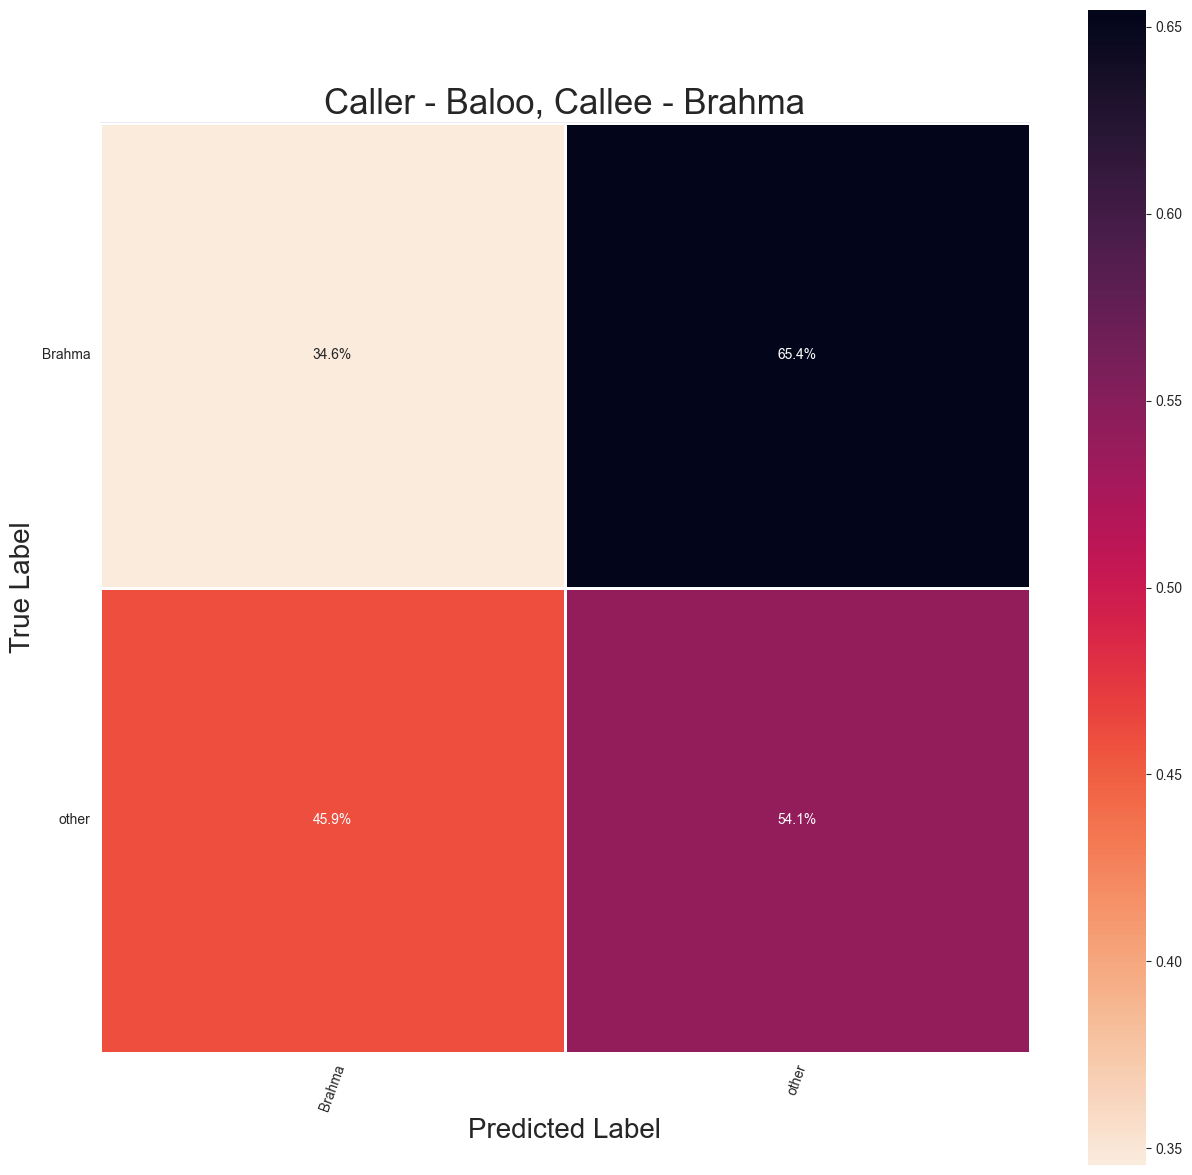

  0%|          | 0/100 [00:00<?, ?it/s]


callees of other in train before filter:
 Bhumi     387
Brahma    387
Name: callee, dtype: int64


  0%|          | 0/100 [00:00<?, ?it/s]


callees of other in train before filter:
 Bhumi     387
Brahma    387
Name: callee, dtype: int64


  0%|          | 0/100 [00:00<?, ?it/s]

callees of other in train before filter:


  0%|          | 0/100 [00:00<?, ?it/s]


 Bhumi     387
Brahma    387
Name: callee, dtype: int64


  0%|          | 0/100 [00:00<?, ?it/s]

callees of other in train before filter:
 Bhumi     35
Brahma    35
Name: callee, dtype: int64
callees in train after filter:
 Bhumi    35
other    35
Name: callee, dtype: int64
callers in test before filter:
 Dia         1222
Dionysus     510
Ceto         347
Ella         229
Name: caller, dtype: int64
callees in test after filter:
 Bhumi    1154
other    1154
Name: callee, dtype: int64


100%|██████████| 100/100 [00:29<00:00,  3.39it/s]


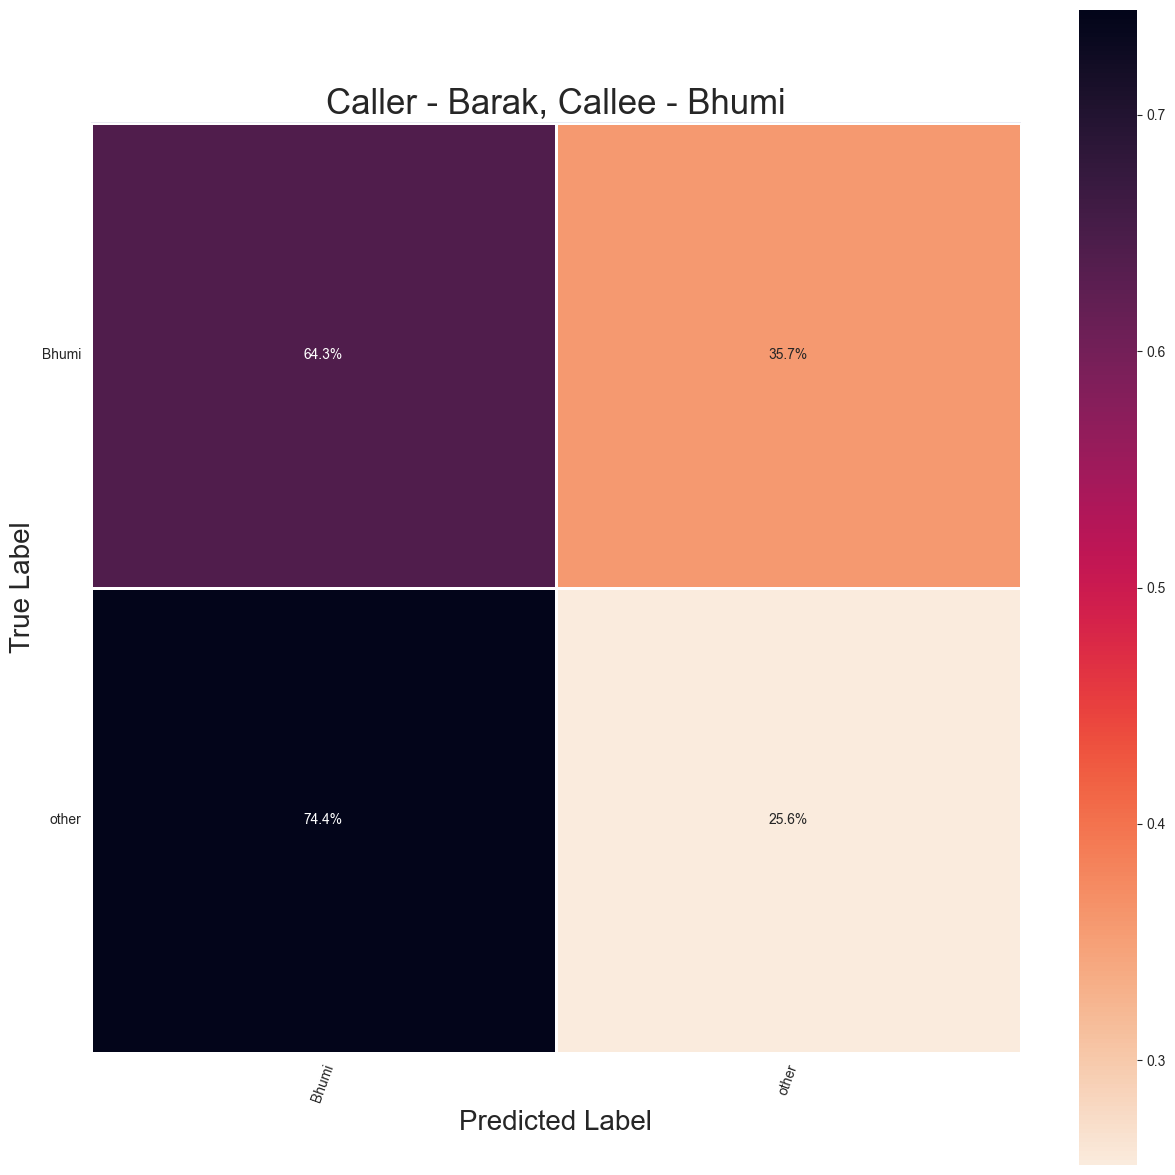

  0%|          | 0/100 [00:00<?, ?it/s]

callees of other in train before filter:
 Bhumi     35
Brahma    35
Name: callee, dtype: int64
callees in train after filter:
 Brahma    35
other     35
Name: callee, dtype: int64
callers in test before filter:
 Dia         1211
Dionysus     544
Ceto         333
Ella         220
Name: caller, dtype: int64
callees in test after filter:
 Brahma    1154
other     1154
Name: callee, dtype: int64


100%|██████████| 100/100 [00:30<00:00,  3.29it/s]


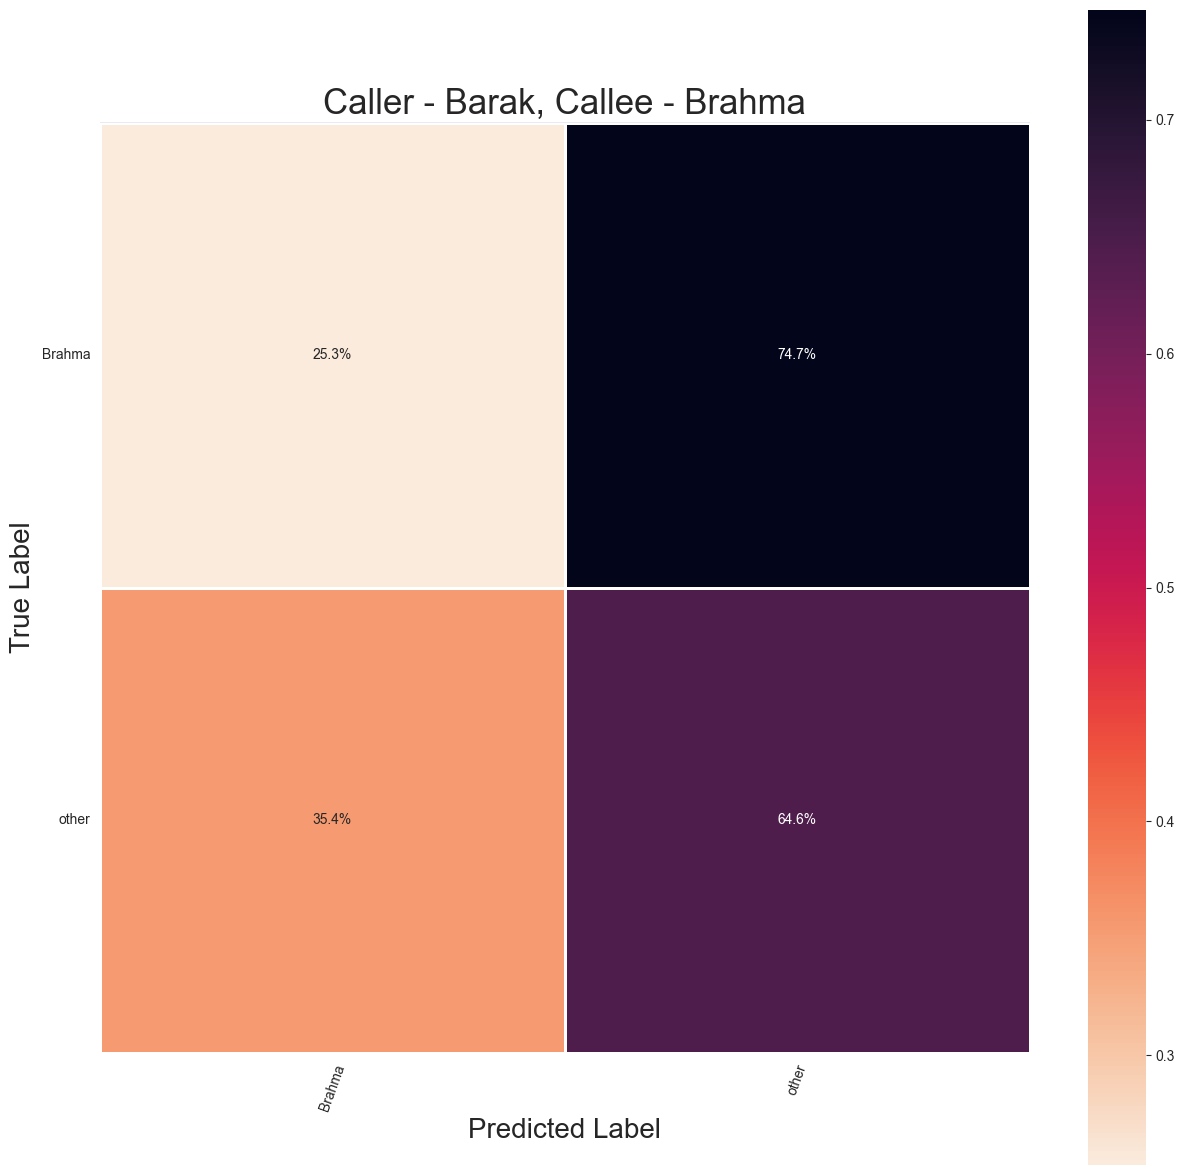

  0%|          | 0/100 [00:00<?, ?it/s]


callees of other in train before filter:
 Bhumi     35
Brahma    35
Name: callee, dtype: int64


  0%|          | 0/100 [00:00<?, ?it/s]


callees of other in train before filter:
 Bhumi     35
Brahma    35
Name: callee, dtype: int64


  0%|          | 0/100 [00:00<?, ?it/s]

callees of other in train before filter:
 Bhumi     35
Brahma    35
Name: callee, dtype: int64


In [7]:
repeat_amount = 100
rus = RandomUnderSampler()
rfc = RandomForestClassifier()

cm_dict = {}

for partner1, partner2 in pairs:

    try:
        cm_list = []
        for i in tqdm.tqdm(range(repeat_amount)):

            train = df.loc[df["caller"] == partner1]
            non_family_members = list(non_family_members_df[non_family_members_df["name"] == partner2]["non_family_members"])[0]
            test = df.loc[df["caller"].isin(non_family_members) & (df["callee"] != partner1)]
            common_callees = set(train["callee"].unique()).intersection(set(test["callee"].unique()))
            train = train[train['callee'].isin(common_callees)]
            test = test[test['callee'].isin(common_callees)]

            X_train, y_train = train.drop(columns=["callee"]), train["callee"]
            X_train, y_train = rus.fit_resample(X_train, y_train)
            if i==0:
                print("callees of other in train before filter:\n", y_train.value_counts())
            train = pd.concat([X_train, y_train], axis=1)
            train.loc[train['callee'] != partner2, 'callee'] = 'other'
            X_train, y_train = train.drop(columns=["caller", "callee", "expname","expnameid"]), train["callee"]
            X_train, y_train = rus.fit_resample(X_train, y_train)
            if i==0:
                print("callees in train after filter:\n", y_train.value_counts())

            X_test, y_test = test.drop(columns=["callee"]), test["callee"]
            X_test, y_test = rus.fit_resample(X_test, y_test)
            if i == 0:
                print("callers in test before filter:\n", X_test["caller"].value_counts())
            test = pd.concat([X_test, y_test], axis=1)
            test.loc[test['callee'] != partner2, 'callee'] = 'other'
            X_test, y_test = test.drop(columns=["caller", "callee", "expname","expnameid"]), test["callee"]
            X_test, y_test = rus.fit_resample(X_test, y_test)
            if i == 0:
                print("callees in test after filter:\n", y_test.value_counts())

            rfc.fit(X_train, y_train)
            y_pred = rfc.predict(X_test)
            cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=[partner2, "other"])
            cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            cm_list.append(cmn)

        cm_dict[(partner1, partner2)] = np.mean(cm_list,  axis=0)

        show_cm(partner1, partner2, cm_dict[(partner1, partner2)], [partner2, "other"])

    except:
        continue